In [1]:
%matplotlib inline
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['0407d4b081b8482e8539c3ab7990ebaf.f-id.e32ffa3fe10145a6b3230a128b92f866']
ds = experiment.get_intermediate_dataset(
    node_id='ab3b3daf-124f-4353-ae9b-afb2d93413a3-318',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()
frame.dtypes

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


{"Error":{"Code":"UserError"                                                   object
Message:"Module with id ab3b3daf-124f-4353-ae9b-afb2d93413a3-318 not found"    object
Target:null                                                                    object
Details:[]                                                                     object
InnerError:null                                                                object
DebugInfo:null}}                                                               object
dtype: object

In [3]:
import pandas as pd
frame['BirthDate'] =  pd.to_datetime(frame['BirthDate'])
frame.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate               datetime64[ns]
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
LastUpdated                     object
BikeBuyer                        int64
AvgMonthSpend            

In [163]:
frame["AvgMonthSpend"].describe()

count    18361.000000
mean        51.766744
std          3.437684
min         44.100000
25%         49.410000
50%         51.420000
75%         53.590000
max         65.290000
Name: AvgMonthSpend, dtype: float64

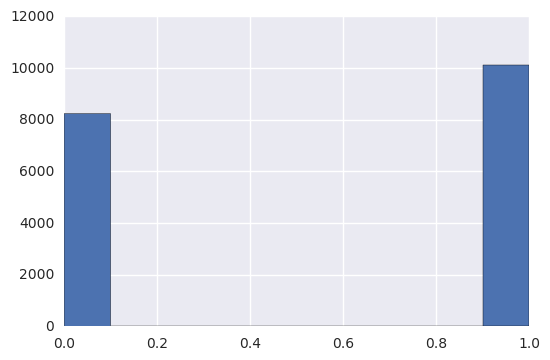

In [164]:
frame["BikeBuyer"].hist()

'Occupation'

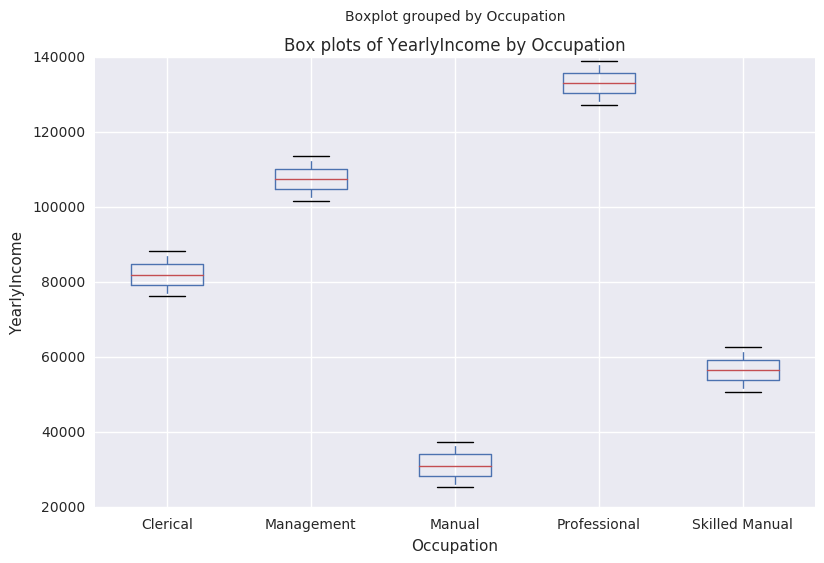

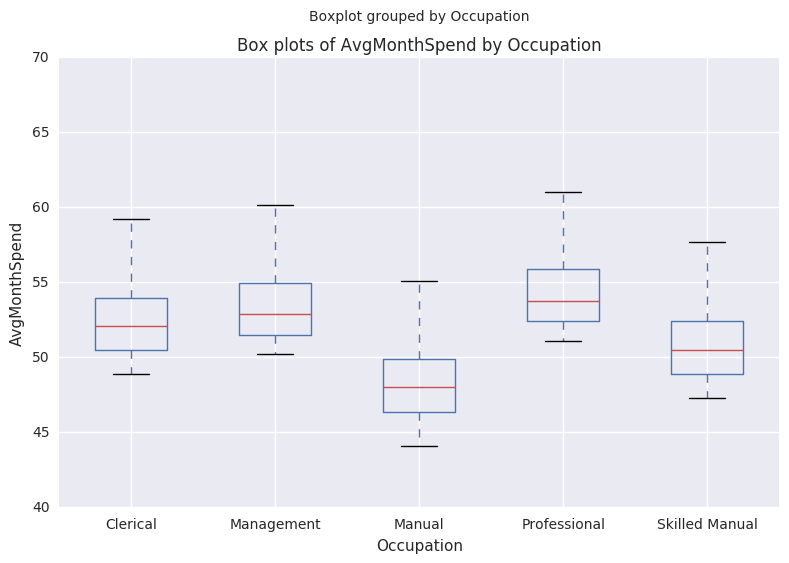

In [165]:
## Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by

plot_cols = ["YearlyIncome", "AvgMonthSpend"]
auto_boxplot(frame, plot_cols, "Occupation")

'Gender'

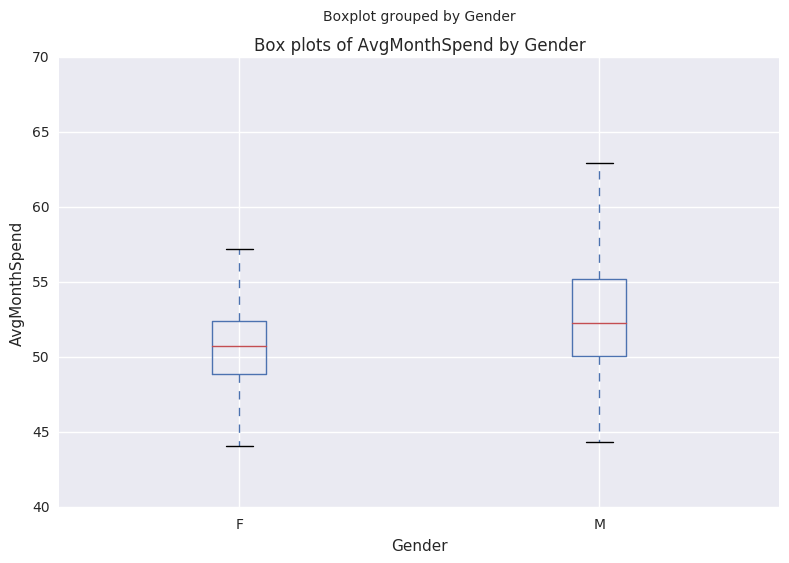

In [166]:
plot_cols = ["AvgMonthSpend"]

auto_boxplot(frame, plot_cols, "Gender")

'MaritalStatus'

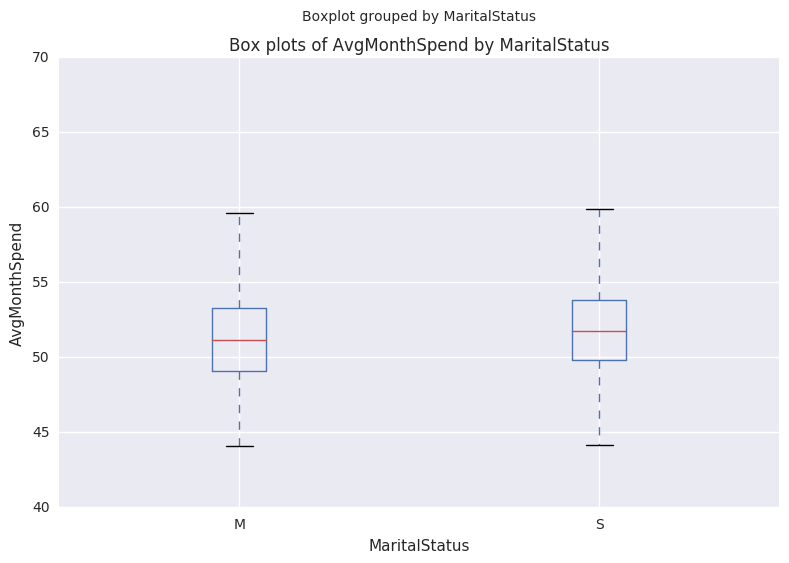

In [167]:
plot_cols = ["AvgMonthSpend"]

auto_boxplot(frame, plot_cols, "MaritalStatus")

'NumberChildrenAtHome'

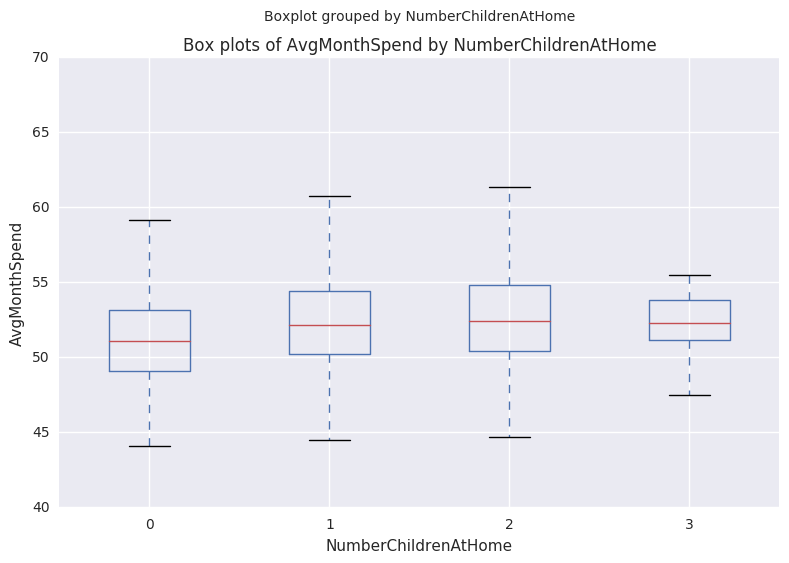

In [168]:
plot_cols = ["AvgMonthSpend"]

auto_boxplot(frame, plot_cols, "NumberChildrenAtHome")

'NumberCarsOwned'

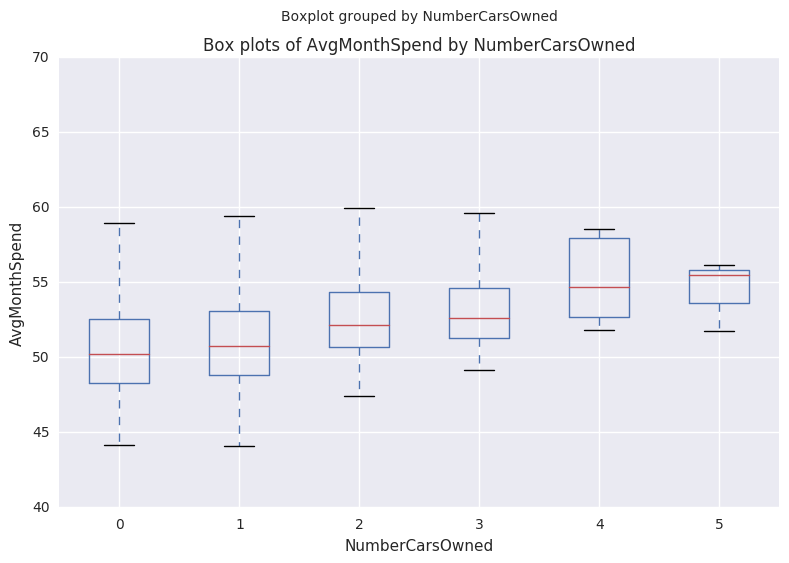

In [169]:
plot_cols = ["AvgMonthSpend"]

auto_boxplot(frame, plot_cols, "NumberCarsOwned")

'BikeBuyer'

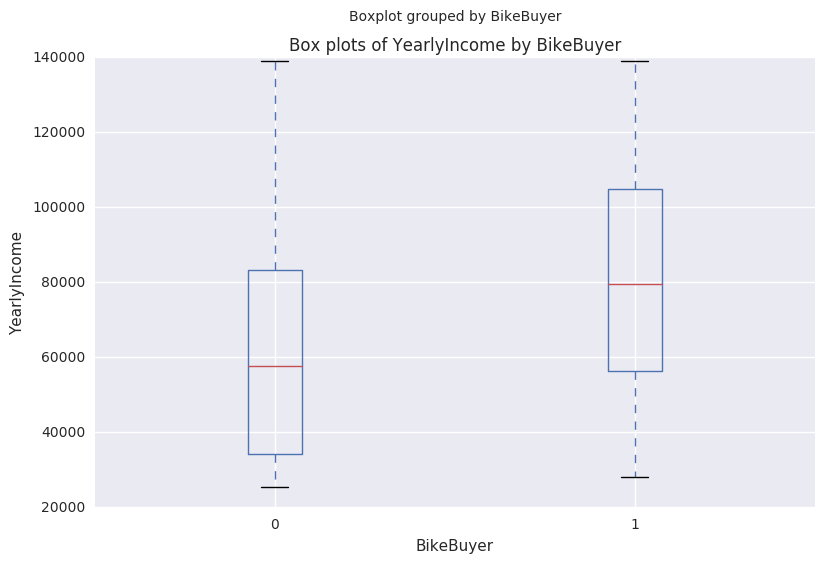

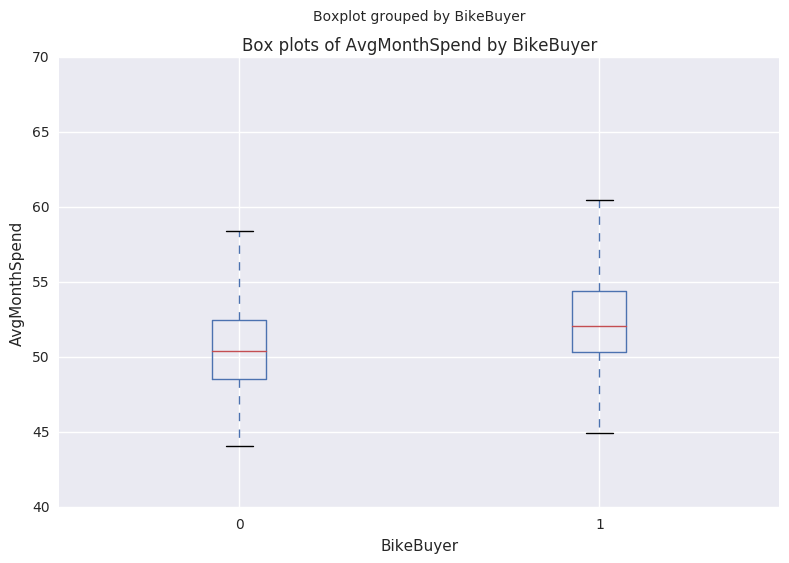

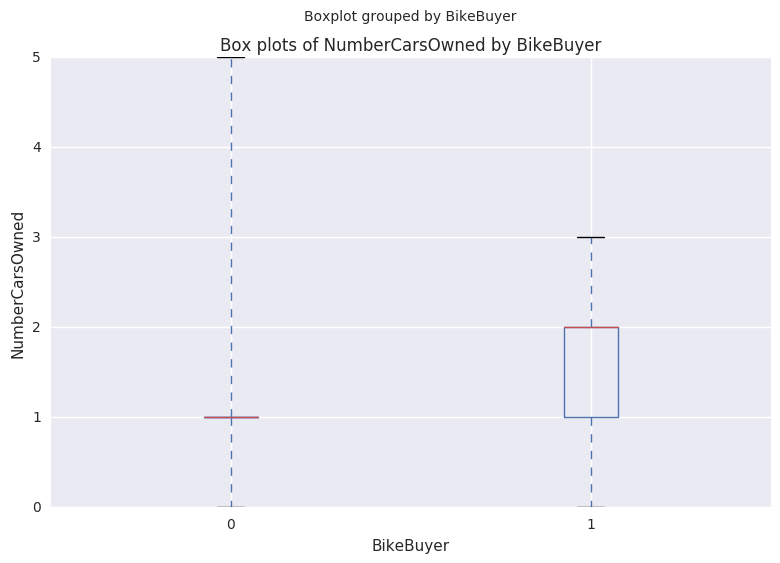

In [170]:
## Define columns for making a conditioned histogram
plot_cols2 = ["YearlyIncome", "AvgMonthSpend", "NumberCarsOwned"]

auto_boxplot(frame, plot_cols2, 'BikeBuyer')

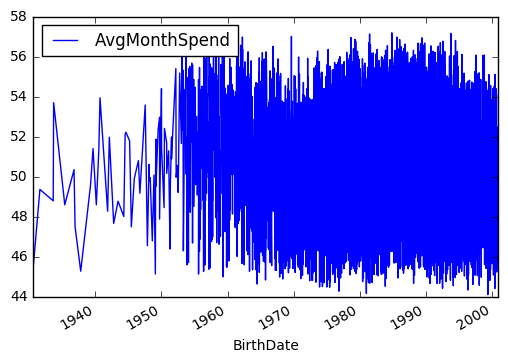

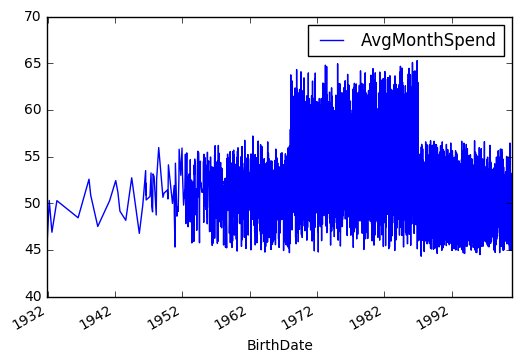

In [5]:
def hist_by_age_and_sex(df):
    from datetime import date
    today = date.today()
    nineteenDate = date(today.year - 19, today.month, today.day)
    twentyfiveDate = date(today.year - 25, today.month, today.day)
    thirtyDate = date(today.year - 30, today.month, today.day)
    fiftyDate = date(today.year - 50, today.month, today.day)
    
    mask1 = (df["BirthDate"] <= thirtyDate) & (df["BirthDate"] <= twentyfiveDate)
    
    df[df["Gender"] == "F"].plot(x="BirthDate", y="AvgMonthSpend")
    df[df["Gender"] == "M"].plot(x="BirthDate", y="AvgMonthSpend")
    
hist_by_age_and_sex(frame)

In [ ]:
def convert_age(df):
    from datetime import date
    import pandas as pd
    today = date.today()
    age = pd.Series([])
    for bday as df["BirthDate"]:
        age.append(today - bday.year)
    
    df["age"] = age
    return df

convert_age(frame)
        